In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/labs/lab2/data/2.2.csv')

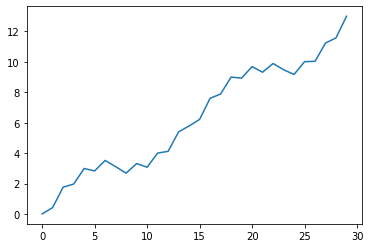

In [4]:
plt.plot(data)

Ряд имеет тренд, поэтому хорошо бы его убрать дифференцированием. Но в задании сказано использовать модель ARMA, а не  ARIMA, поэтому дифференцировать не будем. 

Сначала найдём параметры p, q. Это можно сделать с помощью компьютера. 

Построим автокорреляцию и частичную автокорреляцию.

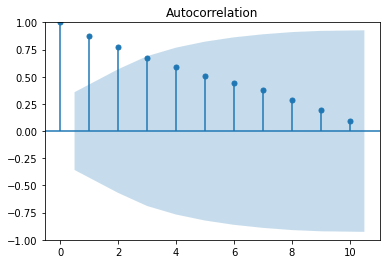

C:\Users\troma\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


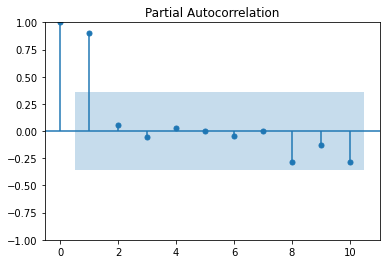

In [5]:
plot_acf(data["y"], lags=10)
plt.show()
plot_pacf(data["y"], lags=10)
plt.show()

Отсюда получаем $p=1,\ q=2$.

Теперь разберёмся с остальными параметрами.

Определение модели ARMA:

$$y_t = \phi_0 + \sum_{i=1}^p\phi_iy_{t-i}+\sum_{i=1}^q\theta_i\varepsilon_{t-i} + \varepsilon_t$$

Здесь $\varepsilon_i$ -- ошибка предсказания $i$-того элемента временного ряда.

### Поиск $\phi_i$

Переформулируем задачу:

$$\overline{y} = Y\overline{\phi} + \overline{\varepsilon}$$

Где 

\begin{equation}
Y = 
\begin{pmatrix}
1 & y_1 & y_2 & \dots & y_p\\
1 & y_2 & y_3 & \dots & y_{p+1} \\
\dots & \dots& \dots & \dots & \dots \\
1 & y_{T-p} & y_{T-p+1} & \dots & y_{T-1} \\
\end{pmatrix} \\
\overline{y} = 
\begin{pmatrix}
y_{p+1} \\
y_{p+2} \\
\dots \\
y_T
\end{pmatrix}\ \ \ \ \ \ \ \ \
\overline{\phi} =
\begin{pmatrix}
\phi_0\\
\phi_1 \\
\dots \\
\phi_p
\end{pmatrix}
\end{equation}

И нам нужно, чтобы были как можно меньшие $\varepsilon_i$, поэтому решаем задачу наименьших квадратов 

$$\big|\big|  \overline{\varepsilon} \big|\big|_2 = \big|\big| \overline{y} - Y\overline{\phi} \big|\big|_2 \rightarrow \min_{\overline{\phi}}$$

Решение этой задачи: $\overline{\phi}^* = (Y^TY)^{-1}Y^T\overline{y}$

### Поиск $\theta_i$

Теперь решим задачу наименьших квадратов для уравнения $\overline{d} = E\overline\theta+\varepsilon'$

Где $\overline{d} = \overline{y} - Y\overline{\phi}^*$, $\overline{\theta} = (\theta_1,\dots, \theta_q)^T$, 

$\varepsilon'=(\varepsilon'_1, \dots, \varepsilon'_q)^T$ -- вектор ошибок предсказаний модели ARMA(p,q),

\begin{equation}
E = 
\begin{pmatrix}
\varepsilon_{p+1} & \varepsilon_{p+2} &\dots &\varepsilon_{p+q} \\
\varepsilon_{p+2} & \varepsilon_{p+3} &\dots &\varepsilon_{p+q+1} \\
\dots & \dots & \dots & \dots \\
\varepsilon_{T-q} & \varepsilon_{T-q+1} &\dots &\varepsilon_{T-1} 
\end{pmatrix}
\end{equation}

$\overline{\theta}^* = (E^TE)^{-1}E^T\overline{d} = (E^TE)^{-1}E^T(\overline{y} - Y\overline{\phi}^*)$

Осталось только посчитать численно.

Сначала $\overline \phi^*$

In [9]:
T = len(data)
p = 1
q = 2

Y = np.ones((T-p, p+1))
for i in range(T-p):
    Y[i][1:]=data['y'][i:i+p]

In [33]:
phi = np.linalg.inv(Y.T @ Y) @ Y.T @ data.values[p:].flatten()
phi

array([0.48279811, 0.99427917])

А теперь $\overline \theta^*$

In [34]:
E = np.ones((T-p-q, q))
d = (data['y'].values [p:]- Y @ phi)
for i in range(T-p-q):
    E[i] = d[i:i+q]
E.shape

(27, 2)

In [35]:
theta = np.linalg.inv(E.T @ E) @ E.T @ d[q:]
theta

array([ 0.52638409, -0.15233593])